# Principal Component Analysis (PCA) 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kashifliaqat/Data_Science_and_Machine-Learning/blob/main/Unsupervised_Learning/4_PCA/PCA.ipynb)

**Task:** Use PCA to reduce the dimensionality of the Wine dataset and then use the reduced dataset to train a classifier to predict the class of wine. Show the effect of PCA on the accuracy of the classifier.

The [Wine Quality Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#) is a popular machine learning dataset used for classification tasks. It contains information on 178 different wines, each with 13 different features. The dataset is commonly used to classify wines into one of three different classes based on their chemical characteristics.

Here are the variables in the Wine dataset:

- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

The target variable in this dataset is the wine class, which is one of three possible values: class_0, class_1, or class_2. The dataset can be loaded using the `load_wine()` function from the scikit-learn library in Python.

These classes represent different cultivars of the wine, namely:

- class_0: 'Barolo' wines
- class_1: 'Grignolino' wines
- class_2: 'Barbera' wines

In [2]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset
The dataset can be loaded using the `load_wine()` function from the scikit-learn library in Python.

In [3]:
# load the dataset and convert to dataframe
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

### Data Visualization and Exploration

In [4]:
print(df.info())     # Get information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [5]:
print(df.head())     # Get first 5 rows of the data

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

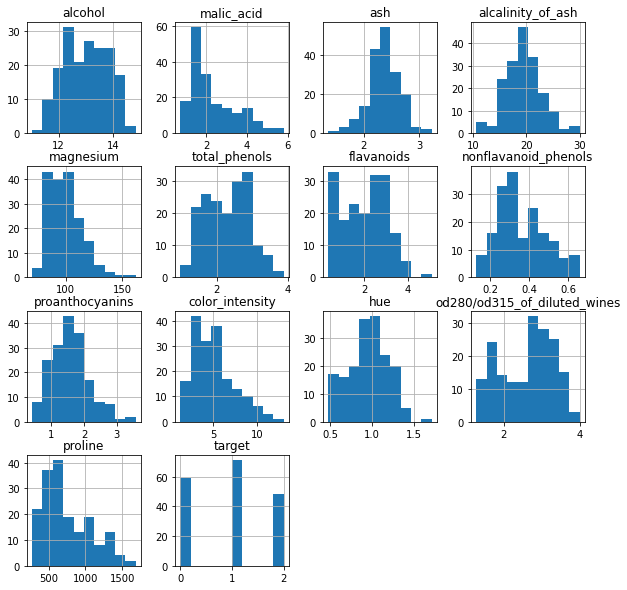

In [6]:
# Plot histograms for each feature
df.hist(figsize=(10,10))
plt.show()

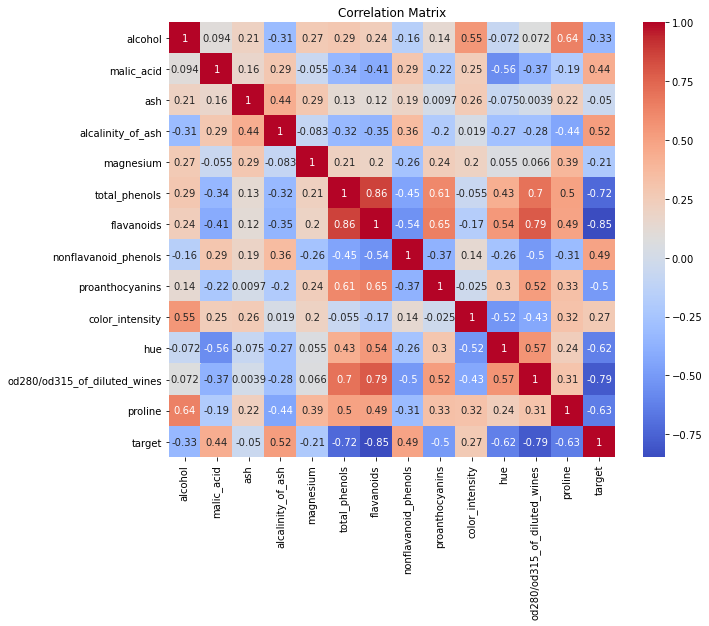

In [7]:
# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

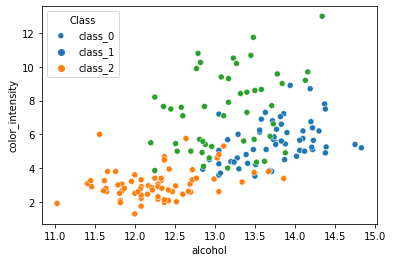

In [8]:
# Add the class names as a new column
df_names = pd.DataFrame(data.data, columns=data.feature_names)
df_names['target'] = data.target
class_names = data.target_names
df_names['class'] = df_names['target'].map(lambda ind: class_names[ind])
# Create a scatter plot of two variables colored by class
sns.scatterplot(x='alcohol', y='color_intensity', data=df_names, hue='class')
plt.legend(title='Class', loc='upper left', labels=class_names)
plt.show()

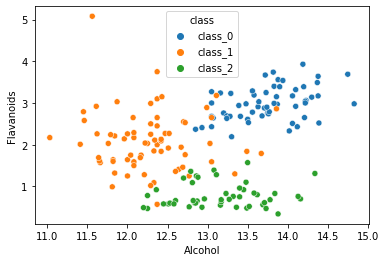

In [9]:
# visualize the dataset
sns.scatterplot(data=df_names, x='alcohol', y='flavanoids', hue='class')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.show()

### Model Building and Evaluation without PCA

- `LogisticRegression` classifier from `scikit-learn` library is used to perform classification task. The model is trained on the original dataset before PCA. The accuracy of the model is evaluated on the test set.

To learn more about the Logistic Regression classifier, refer to the [Logistic Regression Section](https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/tree/main/Supervised_Learning/4_Logistic_Regression) in this repository.

In [10]:
# fit a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# evaluate the performance of the model
y_pred = lr.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('F1 score:', f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.9722222222222222
Precision: 0.9777777777777779
Recall: 0.9761904761904763
F1 score: 0.9761600681140911


### Model Building and Evaluation with PCA

Implement PCA to reduce the dimensionality of the dataset and then train a classifier to predict the class of wine. Show the effect of PCA on the accuracy of the classifier.

#### Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is a dimensionality reduction technique that is used to reduce the dimensionality of large datasets. It is an unsupervised machine learning technique that is widely used for exploratory data analysis and for making predictive models. It is often used as a preprocessing step before applying supervised learning algorithms to reduce the dimensionality of the dataset.

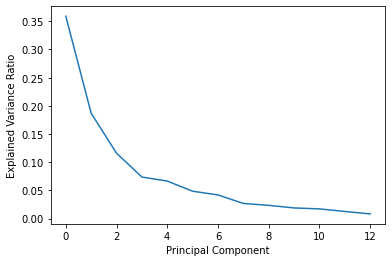

In [11]:
# standardize the features and apply PCA
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# plot the explained variance ratio for each principal component
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [12]:
# fit a random forest classifier using PCA-transformed data
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)

# evaluate the performance of the model using PCA-transformed testing data
y_pred_pca = lr_pca.predict(X_test_pca)
print('Accuracy (with PCA):', accuracy_score(y_test, y_pred_pca))
print('Precision (with PCA):', precision_score(y_test, y_pred_pca, average='macro'))
print('Recall (with PCA):', recall_score(y_test, y_pred_pca, average='macro'))
print('F1 score (with PCA):', f1_score(y_test, y_pred_pca, average='macro'))

Accuracy (with PCA): 1.0
Precision (with PCA): 1.0
Recall (with PCA): 1.0
F1 score (with PCA): 1.0


### Plot Decision Boundary 
Plot the decision boundary of the trained classifier for both the original dataset and the reduced dataset.

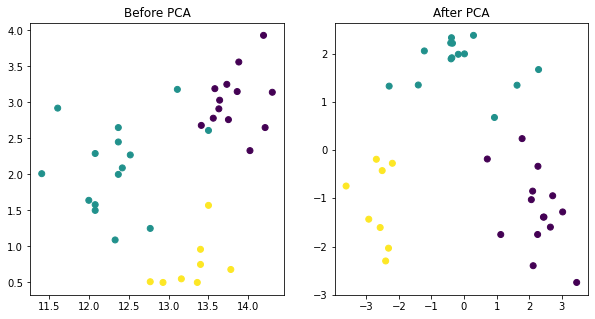

In [13]:
# visualize the decision boundaries of the model before and after PCA
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(X_test['alcohol'], X_test['flavanoids'], c=y_pred)
axs[0].set_title('Before PCA')
axs[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_pca)
axs[1].set_title('After PCA')
plt.show()

### Conclusion
A classification model was trained on the Wine dataset to predict the class of wine. The model was trained on the original dataset and then on the dataset reduced using PCA. The accuracy of the model was evaluated on the test set. The following conclusions were drawn from the results:

1. PCA can be a useful technique to reduce the dimensionality of a high-dimensional dataset and improve the accuracy of machine learning models.
2. The accuracy of the model improved after applying PCA to the dataset. The accuracy of the model increased from 97% to 100% after applying PCA to the dataset.